# Plot helpers

Functions that help make nice plots and confusiones matrices

In [5]:
%matplotlib inline
import sys
sys.path.append("../")
import SpikePy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



## Confusion matrix

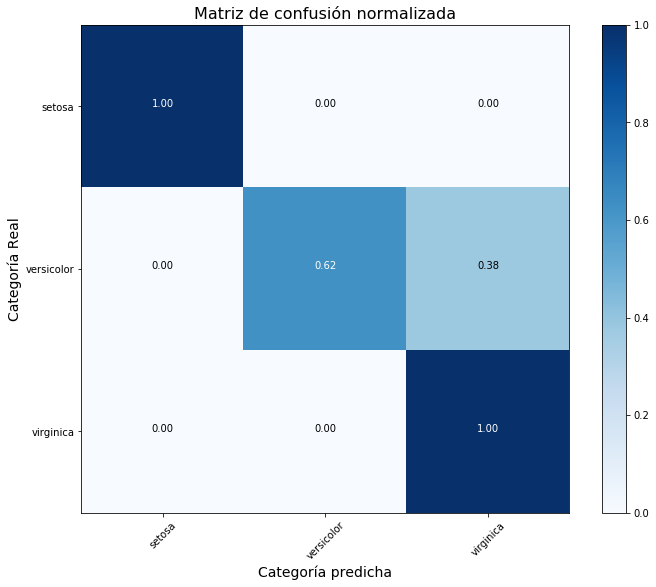

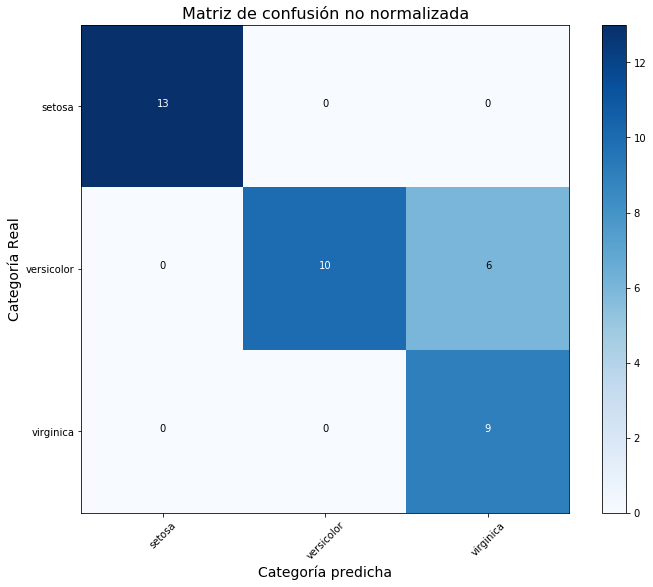

In [9]:
# Data and model
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 8))
sp.plot_confusion_matrix(cnf_matrix, classes=class_names,
                  normalize=True, ylabel='Categoría Real', xlabel='Categoría predicha',
        title="Matriz de confusión normalizada")

plt.figure(figsize=(10, 8))
sp.plot_confusion_matrix(cnf_matrix, classes=class_names,
                  normalize=False, ylabel='Categoría Real', xlabel='Categoría predicha',
        title="Matriz de confusión no normalizada")